In [97]:
import sys
import warnings
import numpy as np

from hmmlearn import hmm
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)

In [98]:
data = np.load('rolls.npy')
split = data.shape[0] // 2
train = data[:split]
valid = data[split:]

In [99]:
start_probs = np.array([1.0, 0.0])
probabilities = [
    [0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.3, 0.3, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.4, 0.2, 0.1],
]

np.random.seed(13)
probabilities = np.random.dirichlet(np.ones(6), size=50)

best_probs = None
best_score = None
best_model = None
for i, probs in enumerate(probabilities):
    temp = [1/6]*6
    emission_probs = np.array([temp, probs])
    model = hmm.CategoricalHMM(n_components=2, random_state=13)
    model.init_params = 't'
    model.startprob_ = start_probs
    model.emissionprob_ = emission_probs
    
    model.fit(train)
    score = model.score(valid)
    # print('Emission Probabilities: {}, Validation Score: {}'.format(emission_probs, score))
    print('Model: {} Validation Score: {}'.format(1+i, score))
    if best_score is None or score > best_score:
        best_score = score
        best_model = model
        best_probs = emission_probs

print('Best model\n Initial Emission Probabilities: {} Validation Score: {}'.format(emission_probs, best_score))

Model: 1 Validation Score: -43180.11644585321
Model: 2 Validation Score: -43181.541049622145
Model: 3 Validation Score: -43183.20545663208
Model: 4 Validation Score: -43170.50902764051
Model: 5 Validation Score: -43172.524149435136
Model: 6 Validation Score: -43173.9461426386
Model: 7 Validation Score: -43177.36617312531
Model: 8 Validation Score: -43183.65143688766
Model: 9 Validation Score: -43175.36586823447
Model: 10 Validation Score: -43182.55579949965
Model: 11 Validation Score: -43181.86961663509
Model: 12 Validation Score: -43146.834337883825
Model: 13 Validation Score: -43182.53761031166
Model: 14 Validation Score: -43183.23603582081
Model: 15 Validation Score: -43177.45841350843
Model: 16 Validation Score: -43178.00584525484
Model: 17 Validation Score: -43167.36029423734
Model: 18 Validation Score: -43177.95715443517
Model: 19 Validation Score: -43183.267129760694
Model: 20 Validation Score: -43182.509473396654
Model: 21 Validation Score: -43178.79078422317
Model: 22 Validati

In [100]:
# Most likely sequence of switching between fair dice and loaded dice -- Transition matrix
print(best_model.transmat_.round(3))

[[0.644 0.356]
 [0.549 0.451]]


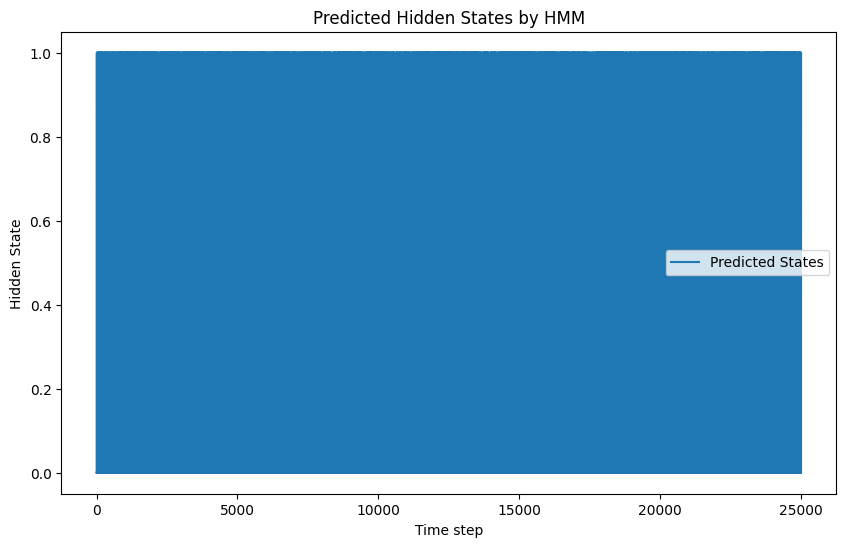

In [101]:
# Plot the generated states
states = best_model.predict(valid)
plt.figure(figsize=(10, 6))
plt.plot(states, label='Predicted States')
plt.xlabel('Time step')
plt.ylabel('Hidden State')
plt.title('Predicted Hidden States by HMM')
plt.legend()
plt.show()

- The task 3.4.2 corressponds to decoding problem in HMM as we are predicting the hidden states on validation set and printing the most likely sequence i.e. transition matrix.

In [102]:
# Switch between the fair and loaded dice
ftol, ltof = 0, 0
prev = states[0]
for curr in states[1:]:
    if prev == 0 and curr == 1:
        ftol += 1
    if prev == 1 and curr == 0:
        ltof += 1
    prev = curr

print(f'Switches from fair to loaded dice: {ftol}')
print(f'Switches from loaded to fair dice: {ltof}')

Switches from fair to loaded dice: 4472
Switches from loaded to fair dice: 4472


- The task 3.4.3 corresponds to learning problem in HMM as we are finding how often there is a transition.

In [103]:
# Bias of the loaded dice
print(best_model.emissionprob_.round(3))

[[0.144 0.111 0.051 0.081 0.145 0.469]
 [0.129 0.179 0.274 0.221 0.132 0.065]]


- From the emission probabilities, the loaded dice is biased towards the outcome 3 and against the outcome 6.
- The task 3.4.4 corresponds to learning problem in HMM as we are finding the bias of the loaded dice.

In [104]:
# Task 3.4
data = np.load('runs.npy')

# Virat - Rohit
start_probs = np.array([0.5, 0.5])
trans_probs = np.array([[0.7, 0.3], [0.3, 0.7]])
emission_probs = np.array([[0.1, 0.3, 0.25, 0.1, 0.2, 0.0, 0.05], [0.2, 0.15, 0.1, 0.05, 0.25, 0.0, 0.25]])

num = 50
best_score = None
best_model = None
for idx in range(num):
    model = hmm.CategoricalHMM(n_components=2, init_params='')
    model.startprob_ = start_probs
    model.transmat_ = trans_probs
    model.emissionprob_ = emission_probs

    model.fit(data)
    score = model.score(data)
    if best_score is None or score > best_score:
        best_score = score
        best_model = model

states = best_model.predict(data)
print(f'Best Score: {best_score}')
print('Transition Matrix: \n', best_model.transmat_.round(3))
print('Emission Probabilities: \n', best_model.emissionprob_.round(3))
print('Start Probabilities: \n', best_model.startprob_.round(3))

first_ball = 'Virat' if states[0] == 0 else 'Rohit'
last_ball = 'Virat' if states[-1] == 0 else 'Rohit'

print(f'First ball Player: {first_ball}')
print(f'Last ball Player: {last_ball}')

Best Score: -50998.50187692316
Transition Matrix: 
 [[0.664 0.336]
 [0.281 0.719]]
Emission Probabilities: 
 [[0.114 0.291 0.264 0.06  0.199 0.    0.072]
 [0.135 0.125 0.104 0.038 0.3   0.    0.298]]
Start Probabilities: 
 [0.916 0.084]
First ball Player: Virat
Last ball Player: Rohit
